# This code tries to forecast average month ground nut values using RNN

### Importing the data

In [2]:
data={24097: 2504.6296296296296, 24098: 2650.0, 24099: 2665.3846153846152, 24100: 2448.2758620689656, 24101: 2583.3333333333335, 24102: 2752.3809523809523, 24103: 3140.0, 24104: 3200.0, 24105: 3200.0, 24106: 3150.0, 24107: 3200.0, 24108: 2568.9473684210525, 24109: 2930.3846153846152, 24110: 3100.0, 24111: 3021.4285714285716, 24112: 3745.0, 24113: 3877.7419354838707, 24114: 3830.0, 24115: 3759.6774193548385, 24116: 3800.0, 24117: 3341.0714285714284, 24118: 3436.6666666666665, 24119: 3263.3333333333335, 24120: 3579.1666666666665, 24121: 3396.7741935483873, 24122: 3401.818181818182, 24123: 3569.1666666666665, 24124: 3436.3636363636365, 24125: 3458.0, 24126: 3718.0, 24127: 3238.653846153846, 24128: 3526.6666666666665, 24129: 4293.333333333333, 24130: 4203.225806451613, 24131: 3460.0, 24132: 3856.6666666666665, 24133: 3491.935483870968, 24134: 3425.6, 24135: 3460.0, 24136: 4102.413793103448, 24137: 4150.0, 24138: 4548.275862068966, 24139: 4700.0, 24140: 4210.666666666667, 24141: 4577.241379310345, 24142: 4401.612903225807, 24143: 4316.0, 24144: 4600.0, 24145: 4353.548387096775, 24146: 4724.642857142857, 24147: 5244.333333333333, 24148: 5328.5, 24149: 5373.322580645161, 24150: 5332.9, 24151: 5561.758620689655, 24152: 6038.75, 24153: 5884.335, 24154: 5685.667, 24155: 5478.846153846154, 24156: 5708.862068965517, 24157: 5826.806451612903, 24158: 5952.928571428572, 24159: 5770.193548387097, 24160: 5445.076923076923, 24161: 5412.0, 24162: 5024.666666666667, 24163: 4853.225806451613, 24164: 4336.862068965517, 24165: 4219.0526315789475, 24166: 4205.733333333334, 24167: 4424.137931034483, 24168: 4241.741935483871, 24169: 4117.806451612903, 24170: 3995.1428571428573, 24171: 3939.2580645161293, 24172: 3958.0, 24173: 4132.4, 24174: 4358.28, 24175: 4166.0, 24176: 4503.580645161291, 24177: 5125.0, 24178: 4468.4, 24179: 4517.0, 24180: 4446.724137931034, 24181: 4375.0, 24182: 4375.0, 24183: 4451.612903225807, 24184: 4500.0, 24185: 5207.068965517241, 24186: 5746.133333333333, 24187: 5733.870967741936, 24188: 5604.8387096774195, 24189: 5678.333333333333, 24190: 5938.709677419355, 24191: 5000.0, 24192: 4677.419354838709}


In [3]:
time=data.keys()
prices=data.values()

## Assuming the data only depend on the previous 4 values

In [4]:
X_train=[]
Y_train=[]
for i in range(len(prices)-4):
    X_train.append(prices[0+i:4+i])
    Y_train.append(prices[1+i:5+i])

In [5]:
print X_train

[[2504.6296296296296, 2650.0, 2665.3846153846152, 2448.2758620689656], [2650.0, 2665.3846153846152, 2448.2758620689656, 2583.3333333333335], [2665.3846153846152, 2448.2758620689656, 2583.3333333333335, 2752.3809523809523], [2448.2758620689656, 2583.3333333333335, 2752.3809523809523, 3140.0], [2583.3333333333335, 2752.3809523809523, 3140.0, 3200.0], [2752.3809523809523, 3140.0, 3200.0, 3200.0], [3140.0, 3200.0, 3200.0, 3150.0], [3200.0, 3200.0, 3150.0, 3200.0], [3200.0, 3150.0, 3200.0, 2568.9473684210525], [3150.0, 3200.0, 2568.9473684210525, 2930.3846153846152], [3200.0, 2568.9473684210525, 2930.3846153846152, 3100.0], [2568.9473684210525, 2930.3846153846152, 3100.0, 3021.4285714285716], [2930.3846153846152, 3100.0, 3021.4285714285716, 3745.0], [3100.0, 3021.4285714285716, 3745.0, 3877.7419354838707], [3021.4285714285716, 3745.0, 3877.7419354838707, 3830.0], [3745.0, 3877.7419354838707, 3830.0, 3759.6774193548385], [3877.7419354838707, 3830.0, 3759.6774193548385, 3800.0], [3830.0, 3759

## Learning to use pybrain to create networks

In [5]:
from pybrain.datasets.supervised import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers.backprop import BackpropTrainer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/envs/dato-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
D=SupervisedDataSet(2,1)

In [7]:
D.addSample([0,0],[0])
D.addSample([0,1],[1])
D.addSample([1,0],[1])
D.addSample([1,1],[0])

In [8]:
print D

input: dim(6, 2)
[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]]

target: dim(6, 1)
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]




In [54]:
n=buildNetwork(0,20,1)

In [47]:
print n

FeedForwardNetwork-56
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-52': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-53': 'bias' -> 'out'>, <FullConnection 'FullConnection-54': 'bias' -> 'hidden0'>, <FullConnection 'FullConnection-55': 'in' -> 'hidden0'>]



In [22]:
T=BackpropTrainer(N,learningrate=0.01,momentum=0.99)

In [23]:
print "MSE before training", T.testOnData(D)

MSE before training 0.70299850138


In [27]:
T.trainOnDataset(D,1000)

In [28]:
print "MSE after training", T.testOnData(D)

MSE after training 3.4666738999e-33


In [31]:
print N.params

[-0.47095879 -0.24000081 -1.6186971  -1.11963235 -1.04107087  0.99777268
 -2.52477115 -3.39731485  2.42804424 -2.62253331 -1.62529913 -2.43354462
 -1.53816996  2.27869999  2.26960018 -1.74086165 -1.83675033]


## Creating a RNN network

In [9]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import LinearLayer, SigmoidLayer ,LSTMLayer
from pybrain.datasets import SequentialDataSet
from itertools import cycle


In [10]:
ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(prices, cycle(prices[1:])):
    ds.addSample(sample, next_sample)

In [19]:

net = buildNetwork(1, 5, 1,hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [6]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 5
CYCLES = 100
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print (epoch, EPOCHS)
    stdout.flush()

print()
print("final error =", train_errors[-1])

NameError: name 'net' is not defined

//anaconda/envs/dato-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


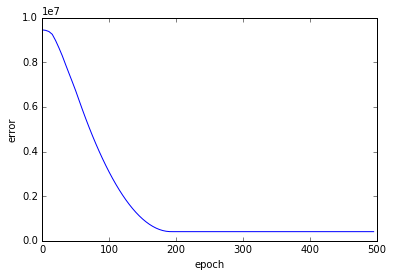

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

In [9]:
for sample, target in ds.getSequenceIterator(0):
    print("sample" , sample)
    print("predicted next sample" , net.activate(sample))
    print("   actual next sample" , target)
    print()

('sample', array([ 2504.62962963,  2504.62962963,  2504.62962963,  2504.62962963]))
('predicted next sample', array([ 4266.14182027]))
('   actual next sample', array([ 2583.33333333]))
()
('sample', array([ 2650.,  2650.,  2650.,  2650.]))
('predicted next sample', array([ 4266.14182027]))
('   actual next sample', array([ 2752.38095238]))
()
('sample', array([ 2665.38461538,  2665.38461538,  2665.38461538,  2665.38461538]))
('predicted next sample', array([ 4266.14182027]))
('   actual next sample', array([ 3140.]))
()
('sample', array([ 2448.27586207,  2448.27586207,  2448.27586207,  2448.27586207]))
('predicted next sample', array([ 4266.14182027]))
('   actual next sample', array([ 3200.]))
()
('sample', array([ 2583.33333333,  2583.33333333,  2583.33333333,  2583.33333333]))
('predicted next sample', array([ 4266.14182027]))
('   actual next sample', array([ 3200.]))
()
('sample', array([ 2752.38095238,  2752.38095238,  2752.38095238,  2752.38095238]))
('predicted next sample', a

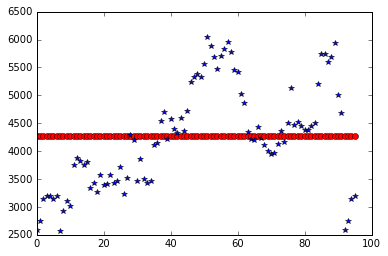

In [16]:
import pylab
pylab.ion()
pylab.show()
count=0
for sample, target in ds.getSequenceIterator(0):
    pylab.plot(count,net.activate(sample),'-o',color='red')
    pylab.plot(count,target,'-*',color='blue')
    count=count+1

In [7]:
print ds

NameError: name 'ds' is not defined